In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [5]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot: xlabel='survived', ylabel='fare'>

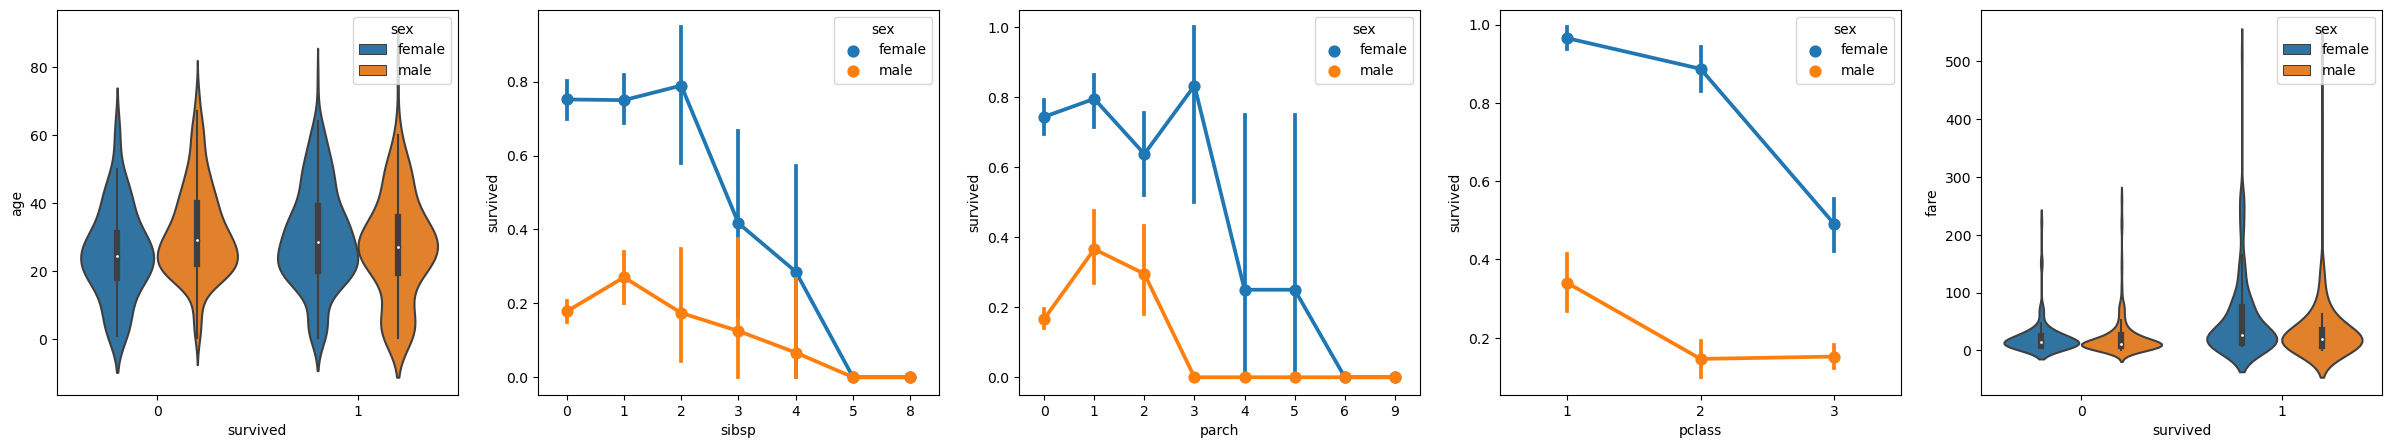

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [8]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [9]:
data.corr().abs()[["survived"]]

/tmp/ipykernel_33406/143381672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [10]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

/tmp/ipykernel_33406/3242586923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [11]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

# Training and Evaluation of a model

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

Normalize the inputs

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

We are using Naïve Bayes algorithm

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


~74% accuracy

# Using neural network

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

2023-01-31 01:46:26.816195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 01:46:29.539463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 01:46:29.539790: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.add(Dense(5, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5897
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.5957
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.7261
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.7548
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.7679
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.7656
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7656
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7715
Epoch 11/50
27/27 [

In [20]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 6ms/step
0.784688995215311


~78% accuracy